이미지 파일 다운로드. 말, 인간 분류하기 위한 사진 파일 다운로드 하기

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2022-12-30 02:07:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   239MB/s    in 0.6s    

2022-12-30 02:07:04 (239 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-12-30 02:09:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  44.9MB/s    in 0.2s    

2022-12-30 02:09:39 (44.9 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



압축파일 풀기

In [3]:
import zipfile

In [4]:
file = zipfile.ZipFile('/tmp/horse-or-human.zip')

In [5]:
file.extractall('/tmp/horse-or-human')

In [6]:
file = zipfile.ZipFile('/tmp/validation-horse-or-human.zip')

In [7]:
file.extractall('/tmp/validation-horse-or-human')

사진이 저장된 폴더 경로 만들기

In [8]:
train_horse_dir = '/tmp/horse-or-human/horses'

In [9]:
train_human_dir = '/tmp/horse-or-human/humans'

In [10]:
validation_horse_dir = '/tmp/validation-horse-or-human/horses'

In [11]:
validation_human_dir = '/tmp/validation-horse-or-human/humans'

각 폴더에 저장되어 있는 사진파일이름들 출력하기

In [12]:
import os

In [13]:
os.listdir(train_horse_dir)

['horse21-3.png',
 'horse04-7.png',
 'horse43-9.png',
 'horse19-8.png',
 'horse18-2.png',
 'horse27-1.png',
 'horse17-0.png',
 'horse30-8.png',
 'horse10-9.png',
 'horse48-7.png',
 'horse48-0.png',
 'horse01-1.png',
 'horse23-4.png',
 'horse21-1.png',
 'horse42-0.png',
 'horse50-6.png',
 'horse39-9.png',
 'horse41-3.png',
 'horse15-6.png',
 'horse33-8.png',
 'horse31-1.png',
 'horse28-0.png',
 'horse49-3.png',
 'horse34-2.png',
 'horse25-7.png',
 'horse40-9.png',
 'horse36-0.png',
 'horse04-2.png',
 'horse19-0.png',
 'horse13-9.png',
 'horse39-5.png',
 'horse22-2.png',
 'horse28-7.png',
 'horse26-5.png',
 'horse25-5.png',
 'horse03-9.png',
 'horse15-0.png',
 'horse35-6.png',
 'horse30-7.png',
 'horse45-0.png',
 'horse24-4.png',
 'horse27-9.png',
 'horse23-1.png',
 'horse42-5.png',
 'horse48-8.png',
 'horse01-5.png',
 'horse49-1.png',
 'horse20-0.png',
 'horse35-5.png',
 'horse46-2.png',
 'horse22-6.png',
 'horse23-2.png',
 'horse20-8.png',
 'horse35-0.png',
 'horse49-2.png',
 'horse08-

각 디렉토리에 저장된 파일의 갯수 확인하기

In [15]:
len(  os.listdir(train_horse_dir) )

500

In [16]:
len(  os.listdir(train_human_dir) )

527

In [17]:
len(  os.listdir(validation_horse_dir) )

128

In [18]:
len(  os.listdir(validation_human_dir) )

128

## Building a Small Model from Scratch
이미지는 300X300 칼라 이미지다.
간단한 모델링 하기.
사진의 결과는 2개중의 하나이미로, 맨 마지막 액티베이션 함수는 시그모이드 사용

In [19]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential

In [20]:
def build_model():
  model = Sequential()
  model.add( Conv2D(16, (3,3) , activation='relu' , input_shape=(300,300,3)  ) )
  model.add( MaxPooling2D( (2,2) , 2 ) )
  model.add( Conv2D(32, (3,3), activation='relu'))
  model.add( MaxPooling2D( (2,2) , 2 ) )
  model.add( Conv2D(64, (3,3) , activation='relu'))
  model.add( MaxPooling2D( (2,2) , 2 ) )

  model.add(Flatten())
  model.add(Dense(512, 'relu'))
  model.add(Dense(1, 'sigmoid'))
  
  model.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
  return model

prints a summary of the NN 

In [21]:
model = build_model()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

**NOTE**: 각 알고리즘 레퍼런스 페이지 

 [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) RMSprop automates learning-rate tuning for us

 [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD)
 
 
  [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.

 RMSprop optimization algorithm 사용하여 컴파일 해보자

### Data Preprocessing



In [ ]:
# 아직 학습할 준비가 다 되지 않았다.
# 왜냐하면, fit 함수에 들어가는 데이터는
# 넘파이 어레이가 들어가야 한다. 
# 하지만 우리가 가지고 있는 데이터는, 이미지 파일(png) 이다.
# 따라서, 현재 상태로는 fit 함수 이용한 학습 불가능 하다.

In [23]:
# 이미지파일을 넘파이 어레이로 변환시켜주는, ImageDataGenerator 라이브러리를 사용한다.

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale= 1/255.0 )

In [26]:
validation_datagen = ImageDataGenerator(rescale= 1/255.0)

In [27]:
# 라이브러리를 변수로 만들었으면, 그다음 할일은,
# 이미지가 들어있는 디렉토리의 정보와 이미지 사이즈정보와 몇개로 분류할지 정보를 
# 알려준다.

In [ ]:
# 넘파이의 target_size 와  모델의 input_shape 은, 가로 세로가 같아야 한다.

In [ ]:
# 클래스모드는, 2개로 분류할땐 binary, 3개 이상일땐 categorical 사용.

In [29]:
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human' , target_size=(300,300) , 
                                  class_mode= 'binary')

Found 1027 images belonging to 2 classes.


In [31]:
validation_generator = validation_datagen.flow_from_directory('/tmp/validation-horse-or-human', (300,300),
                                       class_mode = 'binary')

Found 256 images belonging to 2 classes.


### Training
Let's train for 15 epochs 

In [32]:
epoch_history = model.fit(train_generator, epochs=15, 
                          validation_data= (validation_generator) )

Epoch 1/15
33/33 [==============================] - 18s 250ms/step - loss: 1.1018 - accuracy: 0.7108 - val_loss: 4.1230 - val_accuracy: 0.5820
Epoch 2/15
33/33 [==============================] - 10s 293ms/step - loss: 0.2408 - accuracy: 0.9192 - val_loss: 2.6752 - val_accuracy: 0.7656
Epoch 3/15
33/33 [==============================] - 9s 266ms/step - loss: 0.2734 - accuracy: 0.9406 - val_loss: 3.4808 - val_accuracy: 0.7070
Epoch 4/15
33/33 [==============================] - 8s 252ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 2.0623 - val_accuracy: 0.7930
Epoch 5/15
33/33 [==============================] - 9s 274ms/step - loss: 0.0620 - accuracy: 0.9883 - val_loss: 3.9295 - val_accuracy: 0.8008
Epoch 6/15
33/33 [==============================] - 9s 276ms/step - loss: 0.0998 - accuracy: 0.9893 - val_loss: 3.3362 - val_accuracy: 0.7891
Epoch 7/15
33/33 [==============================] - 9s 258ms/step - loss: 1.3373 - accuracy: 0.9679 - val_loss: 2.7077 - val_accuracy: 0.8242
Epoc

In [33]:
# 모델 평가

In [34]:
model.evaluate(validation_generator)

8/8 [==============================] - 1s 125ms/step - loss: 13.4818 - accuracy: 0.7383


[13.481772422790527, 0.73828125]

In [35]:
import matplotlib.pyplot as plt


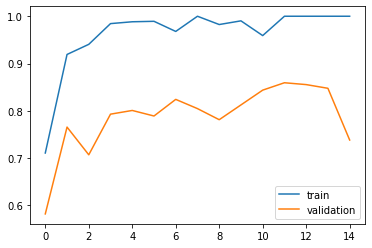

In [36]:
plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.show()

### Running the Model




In [37]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys() :
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img) / 255.0
  print(x)
  print(x.shape)

  x = np.expand_dims(x, axis = 0)

  print(x.shape)

  images = np.vstack( [x] )
  classes = model.predict( images, batch_size = 10 )
  
  print(classes)

  if classes[0] > 0.5 :
    print(fn + " is a human")
  else :
    print(fn + " is a horse")

Saving aaa.jpg to aaa.jpg
[[[0.37254903 0.65882355 0.0627451 ]
  [0.54509807 0.7529412  0.20392157]
  [0.4509804  0.7019608  0.08627451]
  ...
  [0.627451   0.6039216  0.41568628]
  [0.5529412  0.5411765  0.34117648]
  [0.4509804  0.42352942 0.2509804 ]]

 [[0.4509804  0.68235296 0.13333334]
  [0.70980394 0.8745098  0.4509804 ]
  [0.56078434 0.77254903 0.3372549 ]
  ...
  [0.3647059  0.3882353  0.20784314]
  [0.53333336 0.5647059  0.3647059 ]
  [0.5529412  0.58431375 0.39215687]]

 [[0.4392157  0.6745098  0.15686275]
  [0.6627451  0.84705883 0.39215687]
  [0.68235296 0.8901961  0.44313726]
  ...
  [0.23921569 0.3254902  0.13333334]
  [0.34117648 0.4392157  0.22352941]
  [0.21960784 0.31764707 0.09411765]]

 ...

 [[0.77254903 0.7647059  0.7764706 ]
  [0.77254903 0.7647059  0.7764706 ]
  [0.78431374 0.7764706  0.7882353 ]
  ...
  [0.80784315 0.8        0.8117647 ]
  [0.79607844 0.7882353  0.7921569 ]
  [0.80784315 0.8        0.8039216 ]]

 [[0.8        0.7921569  0.8039216 ]
  [0.803921